# ATP Tennis Data - Player Diff Stats + One Hot Encoding Categorial Columns + Matchup Data


In our previous notebooks, we added various match results for players leading up to our current match. 

In this notebook, we will add matchup history between player 1 and 2 to the data and see if this helps our performance. If matchup behaves like history data. I suspect that this will actually decrease our performance for our Decision Tree Model.

Matchup Data that we obtained for each player (created in this [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/6-apt_advanced_feature_engineering-history.ipynb)):

Raw:
* matchup wins
* matchup losses
* matchup games won
* matchup sets won

Percentage:
* matchup win percentage
* matchup games won percentage
* matchup sets won percentage

Diff:
* p1_matchup_games_diff
* p1_matchup_sets_diff
* p1_matchup_wins_diff



### Results from Decision Tree Classifier with player diff + one hot encoded player ID's:

```
Model Score: 0.9307224848075625

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.93      7416
         Win       0.93      0.93      0.93      7394

    accuracy                           0.93     14810
   macro avg       0.93      0.93      0.93     14810
weighted avg       0.93      0.93      0.93     14810
```

# Summary of Results

Decision Tree is still our best model

Here is the results of our Decision Tree model when we added all previous matchup data to our dataset.

We ~1% drop in precision for both wins and losses and 2% recall drop for losses and 1% recall for wins drop meaning that with this data the model is worse at identifying losses

```
Model Score: 0.9187711006076975

              precision    recall  f1-score   support

        Loss       0.92      0.92      0.92      7453
         Win       0.92      0.92      0.92      7357

    accuracy                           0.92     14810
   macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810
```

Here is the outcome when we added previous match record for each player to our dataset:
```
Model Score: 0.9177582714382174

            precision    recall  f1-score   support

      Loss       0.91      0.92      0.92      7453
       Win       0.92      0.91      0.92      7357

  accuracy                           0.92     14810
 macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810
```

We do see a slight drop in our model precision, however, the drop is not as big as the drop from when we added all match history for both players.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe-matchup_all"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff-ohe-history5-matchup5.csv'

START_YEAR = 1998
END_YEAR = 2018



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

In [3]:
import re
history_columns = [col for col in X_train.columns if re.search("history", col)]

print(history_columns)

print(f'Before: X_train.shape {X_train.shape} X_test.shape {X_test.shape}')
X_train = X_train.drop(history_columns, axis=1)
X_test = X_test.drop(history_columns, axis=1)
print(f'After: X_train.shape {X_train.shape} X_test.shape {X_test.shape}')

['p1_history_games_lost', 'p1_history_games_won', 'p1_history_games_won_percentage', 'p1_history_losses', 'p1_history_sets_lost', 'p1_history_sets_won', 'p1_history_sets_won_percentage', 'p1_history_win_percentage', 'p1_history_wins', 'p2_history_games_lost', 'p2_history_games_won', 'p2_history_games_won_percentage', 'p2_history_losses', 'p2_history_sets_lost', 'p2_history_sets_won', 'p2_history_sets_won_percentage', 'p2_history_win_percentage', 'p2_history_wins', 'p1_history_win_percentage_diff', 'p1_history_games_won_percentage_diff', 'p1_history_sets_won_percentage_diff', 'p1_history_wins_diff', 'p1_history_losses_diff', 'p1_history_matches', 'p2_history_matches']
Before: X_train.shape (44429, 5293) X_test.shape (14810, 5293)
After: X_train.shape (44429, 5268) X_test.shape (14810, 5268)


In [4]:
[col for col in X_train.columns if re.search("matchup", col)]

['p1_matchup_games',
 'p1_matchup_games_won_percentage',
 'p1_matchup_losses',
 'p1_matchup_sets',
 'p1_matchup_sets_won_percentage',
 'p1_matchup_win_percentage',
 'p1_matchup_wins',
 'p2_matchup_games',
 'p2_matchup_games_won_percentage',
 'p2_matchup_losses',
 'p2_matchup_sets',
 'p2_matchup_sets_won_percentage',
 'p2_matchup_win_percentage',
 'p2_matchup_wins',
 'p1_matchup_games_diff',
 'p1_matchup_sets_diff',
 'p1_matchup_wins_diff']

# Logistic Regression

In [5]:
lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.674004051316678

ROC/AUC Score: 0.674063887215942
              precision    recall  f1-score   support

        Loss       0.68      0.66      0.67      7453
         Win       0.67      0.68      0.68      7357

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4955  2498
Win   2330  5027


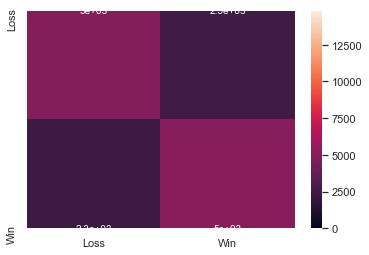

In [6]:
lr.analyze()

In [7]:
# ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.8253207292370021

ROC/AUC Score: 0.8252245356296586
              precision    recall  f1-score   support

        Loss       0.82      0.84      0.83      7453
         Win       0.83      0.81      0.82      7357

    accuracy                           0.83     14810
   macro avg       0.83      0.83      0.83     14810
weighted avg       0.83      0.83      0.83     14810

      Loss   Win
Loss  6261  1192
Win   1395  5962


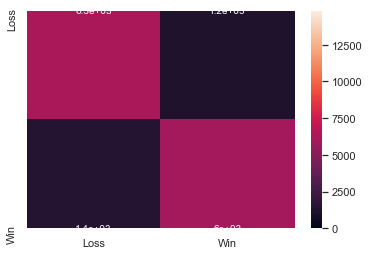

In [10]:
knn.analyze()

In [11]:
# ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.9187711006076975

ROC/AUC Score: 0.9187584956525439
              precision    recall  f1-score   support

        Loss       0.92      0.92      0.92      7453
         Win       0.92      0.92      0.92      7357

    accuracy                           0.92     14810
   macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810

      Loss   Win
Loss  6862   591
Win    612  6745


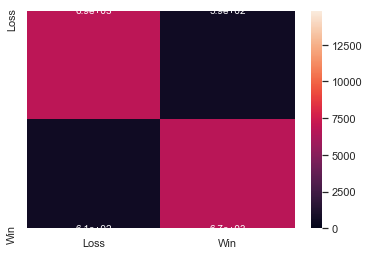

In [14]:
dt.analyze()

In [15]:
# ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.787508440243079

ROC/AUC Score: 0.7872495831381984
              precision    recall  f1-score   support

        Loss       0.77      0.83      0.80      7453
         Win       0.81      0.75      0.78      7357

    accuracy                           0.79     14810
   macro avg       0.79      0.79      0.79     14810
weighted avg       0.79      0.79      0.79     14810

      Loss   Win
Loss  6165  1288
Win   1859  5498


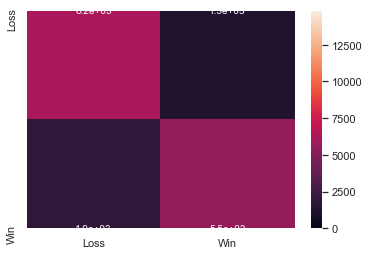

In [18]:
rf.analyze()

In [19]:
# ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3157           10.75m
         2           1.2579           10.64m
         3           1.2102           10.57m
         4           1.1722           10.64m
         5           1.1405           10.44m
         6           1.1058           10.14m
         7           1.0785           10.00m
         8           1.0558           10.01m
         9           1.0321            9.78m
        10           1.0159            9.57m
        20           0.8899            8.08m
        30           0.8228            6.98m
        40           0.7841            5.93m
        50           0.7554            4.91m
        60           0.7362            3.87m
        70           0.7244            2.87m
        80           0.7078            1.91m
        90           0.6799           59.56s
       100           0.6752            0.00s


Model Score: 0.8561782579338285

ROC/AUC Score: 0.8560268972772166
              precision    recall  f1-score   support

        Loss       0.84      0.88      0.86      7453
         Win       0.87      0.83      0.85      7357

    accuracy                           0.86     14810
   macro avg       0.86      0.86      0.86     14810
weighted avg       0.86      0.86      0.86     14810

      Loss   Win
Loss  6554   899
Win   1231  6126


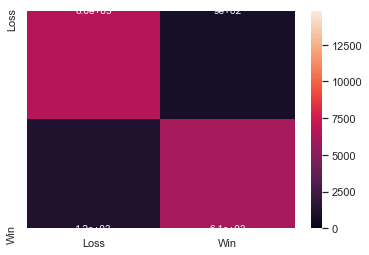

In [22]:
gb.analyze()

In [23]:
# ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7512491559756921

ROC/AUC Score: 0.7509787081094902
              precision    recall  f1-score   support

        Loss       0.73      0.79      0.76      7453
         Win       0.77      0.71      0.74      7357

    accuracy                           0.75     14810
   macro avg       0.75      0.75      0.75     14810
weighted avg       0.75      0.75      0.75     14810

      Loss   Win
Loss  5908  1545
Win   2139  5218


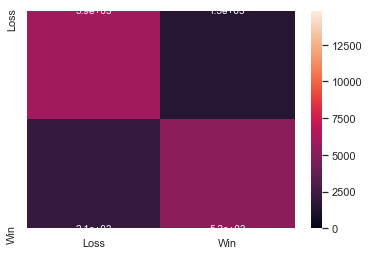

In [26]:
ab.analyze()

In [27]:
# ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

Saving report: ../reports/summary.csv


# Results

* Decision Tress is still our best model, although adding this data decreased our performance to be about 1% (from diff+ohe_player performance)
* No change in performance for Ada Boost or Logistic regression or Gradient Boost
* Around 5% decrease in accuracy for KNN and Random Forest

In [29]:
report = pd.read_csv(REPORT_FILE)
report.tail(5)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
49,KNeighborsClassifier,diff-ohe-matchup_all,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.825321,0.825225,"{""0"": {""0"": 6261, ""1"": 1395}, ""1"": {""0"": 1192,...","{""Loss"": {""precision"": 0.8177899686520376, ""re...",../models/kneighborsclassifier-1998-2018-diff-...,0.0,0.0,0.0
50,DecisionTreeClassifier,diff-ohe-matchup_all,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.918771,0.918758,"{""0"": {""0"": 6862, ""1"": 612}, ""1"": {""0"": 591, ""...","{""Loss"": {""precision"": 0.9181161359379181, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0
51,RandomForestClassifier,diff-ohe-matchup_all,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.787508,0.787250,"{""0"": {""0"": 6165, ""1"": 1859}, ""1"": {""0"": 1288,...","{""Loss"": {""precision"": 0.7683200398803589, ""re...",../models/randomforestclassifier-1998-2018-dif...,0.0,0.0,0.0
52,GradientBoostingClassifier,diff-ohe-matchup_all,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.856178,0.856027,"{""0"": {""0"": 6554, ""1"": 1231}, ""1"": {""0"": 899, ...","{""Loss"": {""precision"": 0.8418754014129737, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,10.0,10.0
53,AdaBoostClassifier,diff-ohe-matchup_all,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.751249,0.750979,"{""0"": {""0"": 5908, ""1"": 2139}, ""1"": {""0"": 1545,...","{""Loss"": {""precision"": 0.7341866534112091, ""re...",../models/adaboostclassifier-1998-2018-diff-oh...,0.0,2.0,2.0


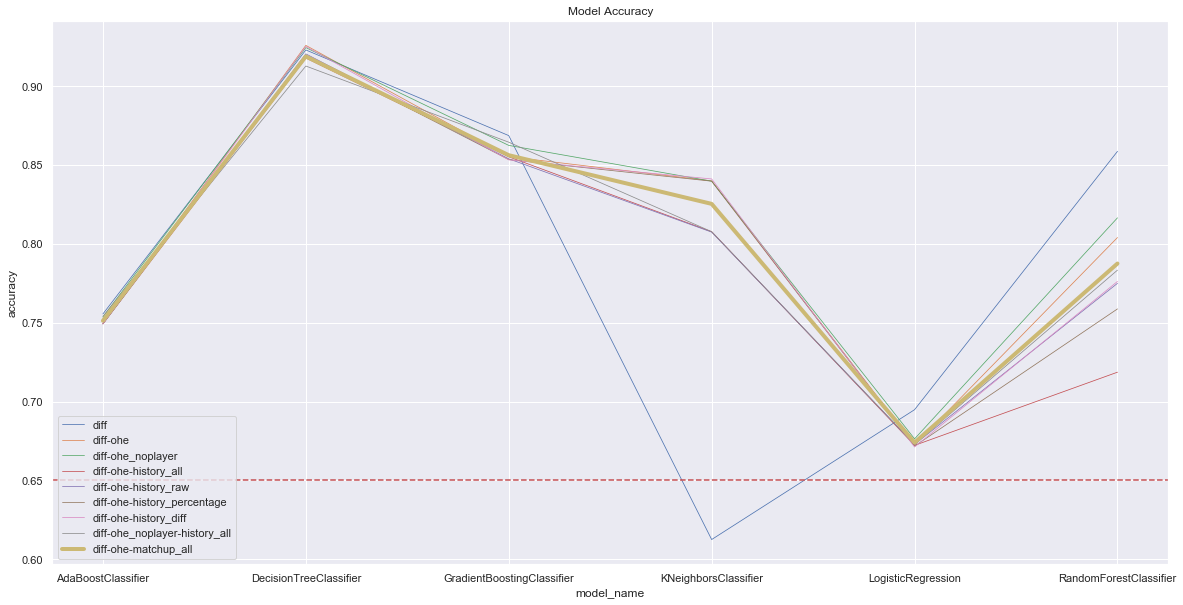

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

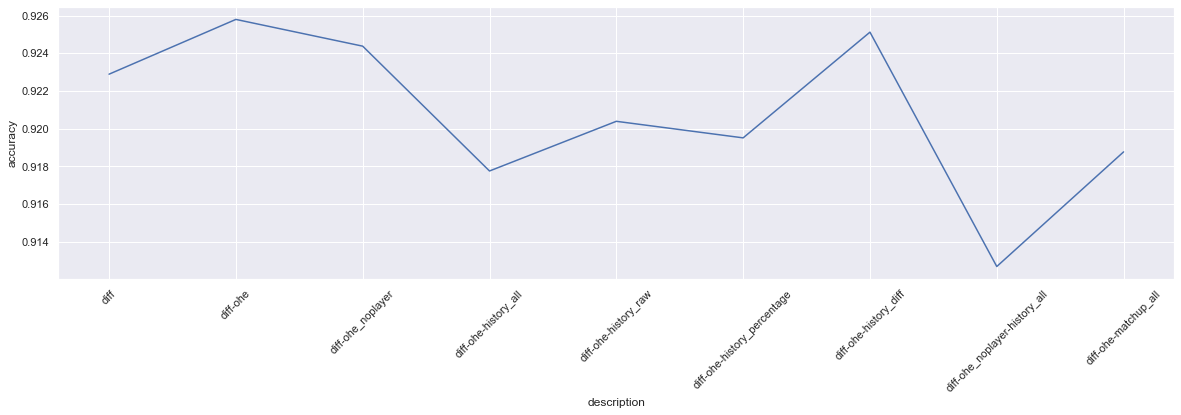

In [31]:
dt_report = report[(report.model_name == 'DecisionTreeClassifier')]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.set_label("Decision Tree Classifier Accuracy")
_ = plt.xticks(rotation=45)


# Feature Analysis

In [32]:
import shap

shap.initjs()

mw = ModelWrapper.get_model_wrapper_from_report(dt_report[dt_report.description == DESCRIPTION])


explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)
print(np.array(shap_values).shape)

(2, 14810, 5268)


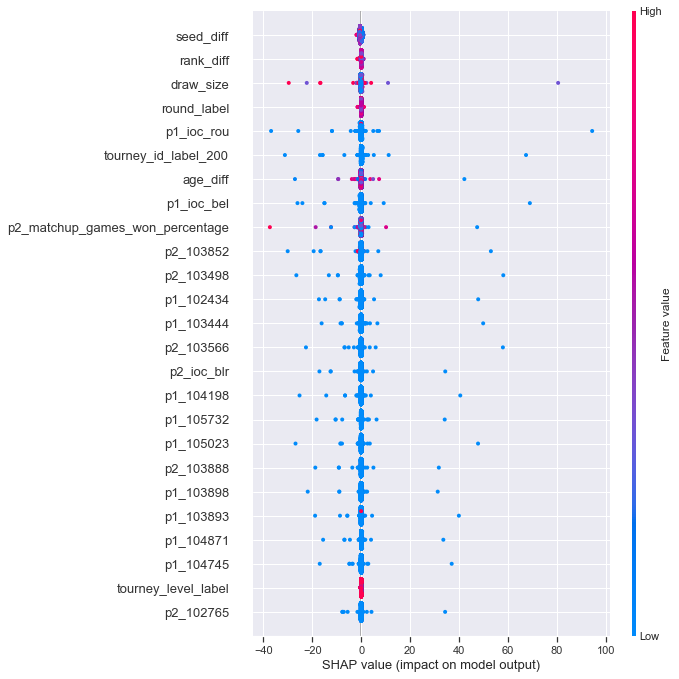

In [33]:
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns, max_display=25)

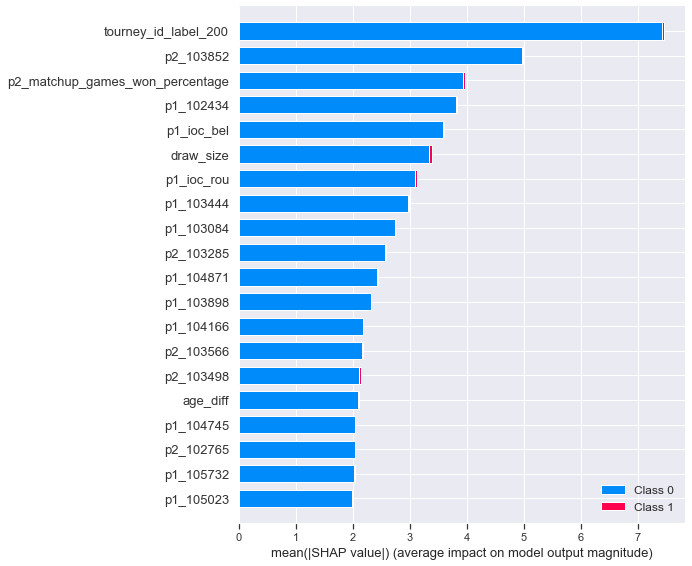

In [34]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, title="Feature Importance")